In [17]:
import pandas as pd
import numpy as np

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset 

In [20]:
data_df= pd.read_csv("../data/data.csv")

In [21]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Data imputation (Mising Data Replacement)
dataset often have mising values and this can cause problems for machine learning algorithms. It is considered good practise to identify and replace missing values in each column of your dataset prior to performing predictive modelling. This method of missing dât replacement is referred to as data imputation

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [23]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent= missing_data/len(data_df)*100
    print(f"Column {col}:  has {missing_percent} % missing data")
    

Column Country:  has 0.0 % missing data
Column Age:  has 10.0 % missing data
Column Salary:  has 10.0 % missing data
Column Purchased:  has 0.0 % missing data


<Axes: >

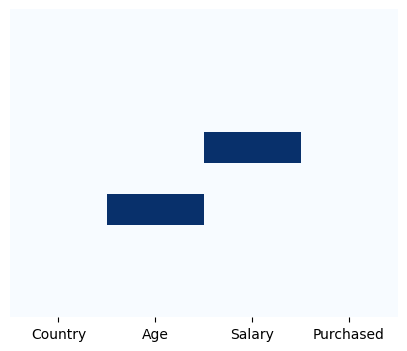

In [24]:
fig, ax= plt.subplots(figsize =(5,4))
sns.heatmap(data_df.isna(),cmap="Blues", cbar=False, yticklabels=False)

In [37]:
# iloc[row, col], x như đầu vào , y như đầu ra: => dự đoán mua xe thì đầu ra là purchased
X = data_df.iloc[:,:-1].values

In [38]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [39]:
y = data_df.iloc[:,-1].values

In [40]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [41]:
from sklearn.impute import SimpleImputer

#Create an instance of Class SimpleImputer: np.nan is the eempty value in the database
imputer =SimpleImputer(missing_values= np.nan, strategy="mean") # lấy trung bình giá trị cho những missing data
# x lấy 2 cột cuối cùng là cột index 1 và 2
imputer.fit(X[:,1:3]) #tính giá trị trung bình từ imputer sau đó sẽ transform để gắn lại vào X
X[:,1:3]=imputer.transform(X[:,1:3])

In [42]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encode Categorical Data
## Encode Independent variable(X)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# encode column số 1 và pass qua column số 2 và 3
city= ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])],remainder="passthrough")
X=city.fit_transform(X)

In [44]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

## Encode Dependent Variable (Y)

In [45]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
y = label.fit_transform(y)

In [46]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Splitting the dataset (X= data, y= output) in to the Trainning set and Test set


In [49]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)  

In [50]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [51]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [52]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [53]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [56]:
y_test

array([0, 1])

In [59]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:]= sc.fit_transform(X_train[:,3:])


In [66]:
X_train[:,3:]


array([[-0.7529426005471072, -0.6260377781240922],
       [1.0084538079529848, 1.013042950055349],
       [1.791296656175248, 1.8325833141450698],
       [-1.7314961608249362, -1.0943465576039326],
       [-0.36152117643597576, 0.4276569757055486],
       [0.22561095973072165, 0.05040823668012208],
       [-0.16581046438040992, -0.274806193514212],
       [-0.013591021670525259, -1.328500947343853]], dtype=object)

In [69]:
X_test[:,3:]=sc.fit_transform(X_test[:,3:])
X_test

array([[0.0, 1.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 1.0, -1.0, -1.0]], dtype=object)